# Individual household power consumption Data Set

**Abstract**: Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.


## Data Set Information

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

**Notes:**
1. (global_active_power · 1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but *for some timestamps, the measurement values are missing*: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

## Attribute Information

1. **date**: Date in format dd/mm/yyyy

2. **time**: time in format hh:mm:ss

3. **global_active_power**: household global minute-averaged active power (in kilowatt)

4. **global_reactive_power**: household global minute-averaged reactive power (in kilowatt)

5. **voltage**: minute-averaged voltage (in volt)

6. **global_intensity**: household global minute-averaged current intensity (in ampere)

7. **sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8. **sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9. **sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [82]:
import pandas as pd
df = pd.read_csv("data.csv", delimiter=";")
df.head(10)

C:\Users\ARTEM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [83]:
import numpy as np
from datetime import date
import calendar
import matplotlib.pyplot as plt; plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

def print_graph(start, skip, n):
    df.replace({'?': 0}, regex=False, inplace=True)
    global_power_dict = {'DateTime' : df.Date.astype(str)[start:start+n].apply(lambda s : s + " ") + df.Time[start:start+n], 'Power' : df.Global_active_power[start:start+n].astype(float).apply(lambda x : x * 1000 / 60)}
    global_power = pd.DataFrame(global_power_dict)

    global_power.DateTime = pd.to_datetime(global_power.DateTime,format= '%d/%m/%Y %H:%M:%S')
    global_power.Power = global_power.Power.rolling(skip).mean()
    global_power = global_power.iloc[::skip]

    # global_power.plot(x="DateTime", y="Power")
    # plt.show()
    return global_power
    

global_power = print_graph(100, 1440, len(df) - 5 - 100)['Power']

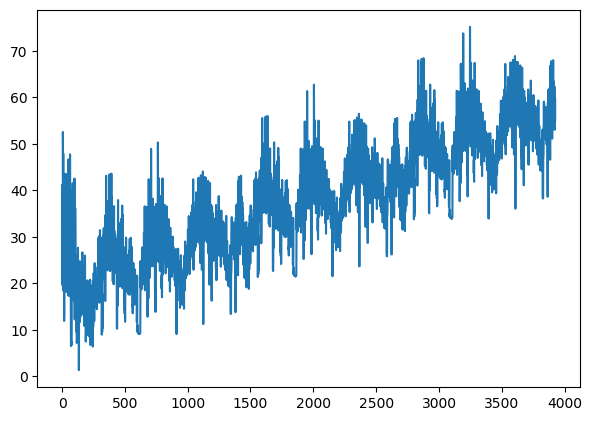

In [84]:
global_power = global_power.tolist()
global_power[0] = 30
global_power = global_power + [global_power[i] for i in range(200, len(global_power))] + [global_power[i] for i in range(200, len(global_power))]
for i in range(0, len(global_power)):
    global_power[i] += i * 0.01
    
plt.plot(global_power)
plt.show()

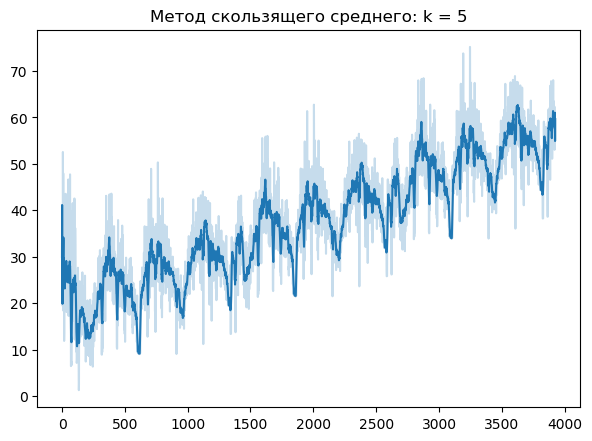

In [85]:
# Сглаживание временного ряда - метод скользящего среднего

def sma(k, a):
    res = [a[i] for i in range(0, k)]
    for i in range(k, len(a) - k):
        sum = 0
        for j in range(-k, k + 1):
            sum += a[j + i]
        res.append(sum / (2 * k + 1))

    for i in range(0, k):
        res.append(a[i + len(a) - k])
    return res
               
plt.plot(global_power, alpha=0.25)
plt.plot(sma(5, global_power), c = "tab:blue")
plt.title("Метод скользящего среднего: k = 5")
plt.show()

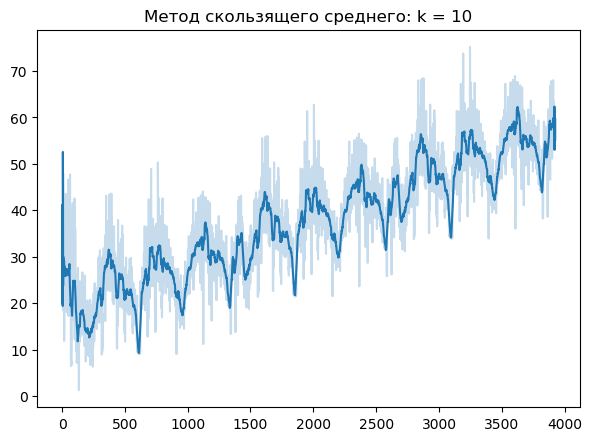

In [86]:
plt.plot(global_power, alpha=0.25)
sma_val = sma(10, global_power)
plt.plot(sma(10, global_power), c = "tab:blue")
plt.title("Метод скользящего среднего: k = 10")
plt.show()

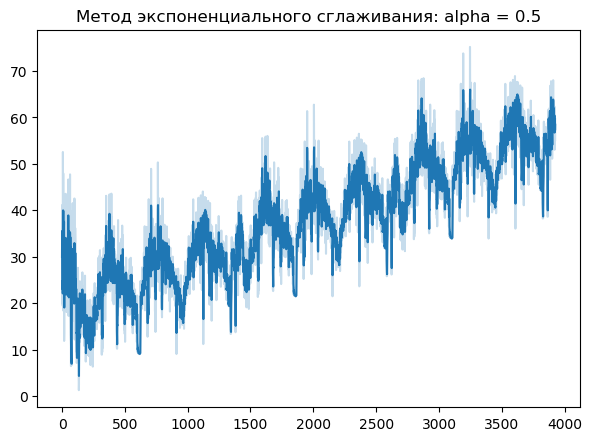

In [87]:
# Сглаживание временного ряда - метод экспоненциального сглаживания

def ema(alpha, a):
    res = [a[0]]
    for i in range(1, len(a)):
        res.append(alpha * a[i] + (1 - alpha) * res[i - 1])
    return res

alpha0 = 0.5
plt.plot(global_power, alpha=0.25)
plt.plot(ema(alpha0, global_power), c = "tab:blue")
plt.title("Метод экспоненциального сглаживания: alpha = " + str(alpha0))
plt.show()

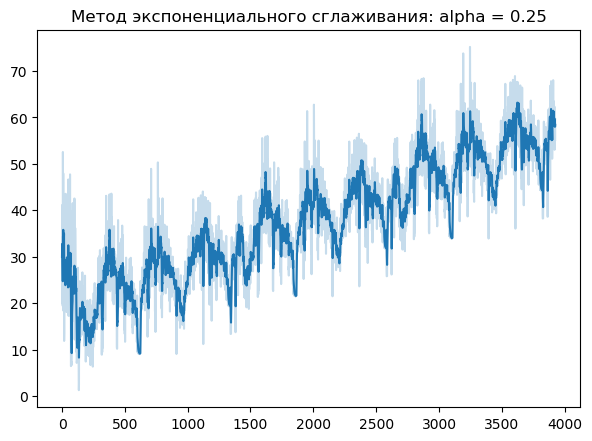

In [88]:
alpha0 = 0.25
plt.plot(global_power, alpha=0.25)
plt.plot(ema(alpha0, global_power), c = "tab:blue")
plt.title("Метод экспоненциального сглаживания: alpha = " + str(alpha0))
plt.show()

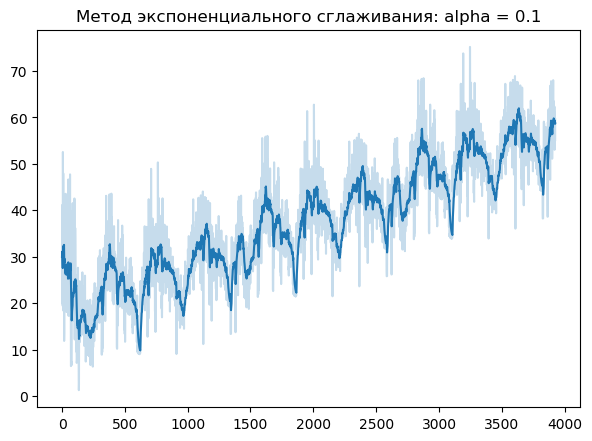

In [89]:
alpha0 = 0.1
plt.plot(global_power, alpha=0.25)
plt.plot(ema(alpha0, global_power), c = "tab:blue")
plt.title("Метод экспоненциального сглаживания: alpha = " + str(alpha0))
plt.show()

In [90]:
x = [i for i in range(0, len(global_power))]

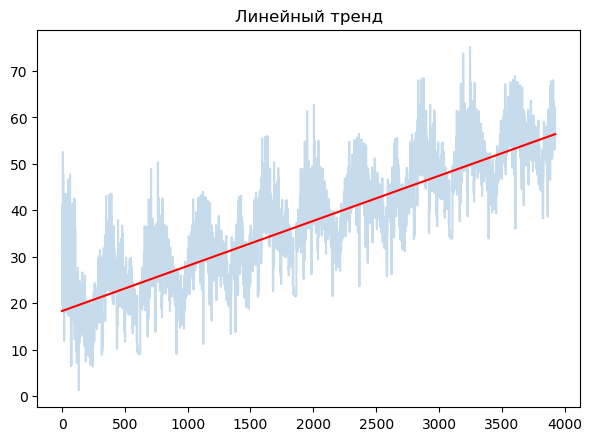

In [91]:
p1 = np.polyfit(x, global_power, 1)
p1_val = np.polyval(p1, x)
plt.plot(global_power, alpha=0.25)
plt.title("Линейный тренд")
plt.plot(x, p1_val, 'r-')
plt.show()

In [92]:
from sklearn.metrics import r2_score
r2 = r2_score(global_power, p1_val)
print(f"Коэффициент детерминации: {r2:.8f}")

Коэффициент детерминации: 0.72315582


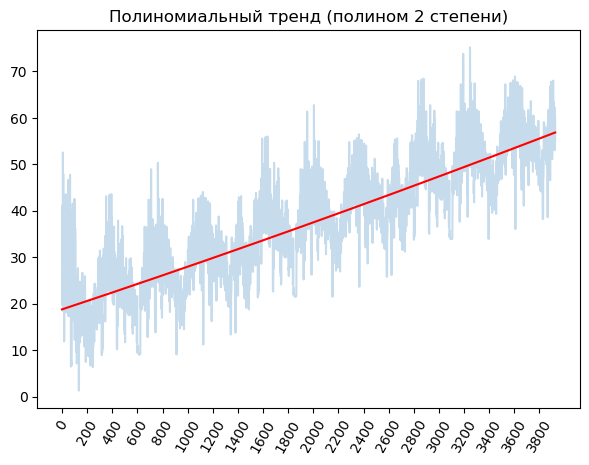

In [103]:
p2 = np.polyfit(x, global_power, 2)
p2_val = np.polyval(p2, x)
plt.plot(global_power, alpha=0.25)
plt.title("Полиномиальный тренд (полином 2 степени)")
plt.plot(x, p2_val, 'r-')
plt.xticks(np.arange(0,4000, 200))
plt.xticks(rotation=60)
plt.show()

In [94]:
r2 = r2_score(global_power, p2_val)
print(f"Коэффициент детерминации: {r2:.8f}")

Коэффициент детерминации: 0.72340072


In [95]:
print("Таким образом, вторая полиномиальная модель лучше соответствует модели данных")

Таким образом, вторая полиномиальная модель лучше соответствует модели данных


MAPE: 17.167310%


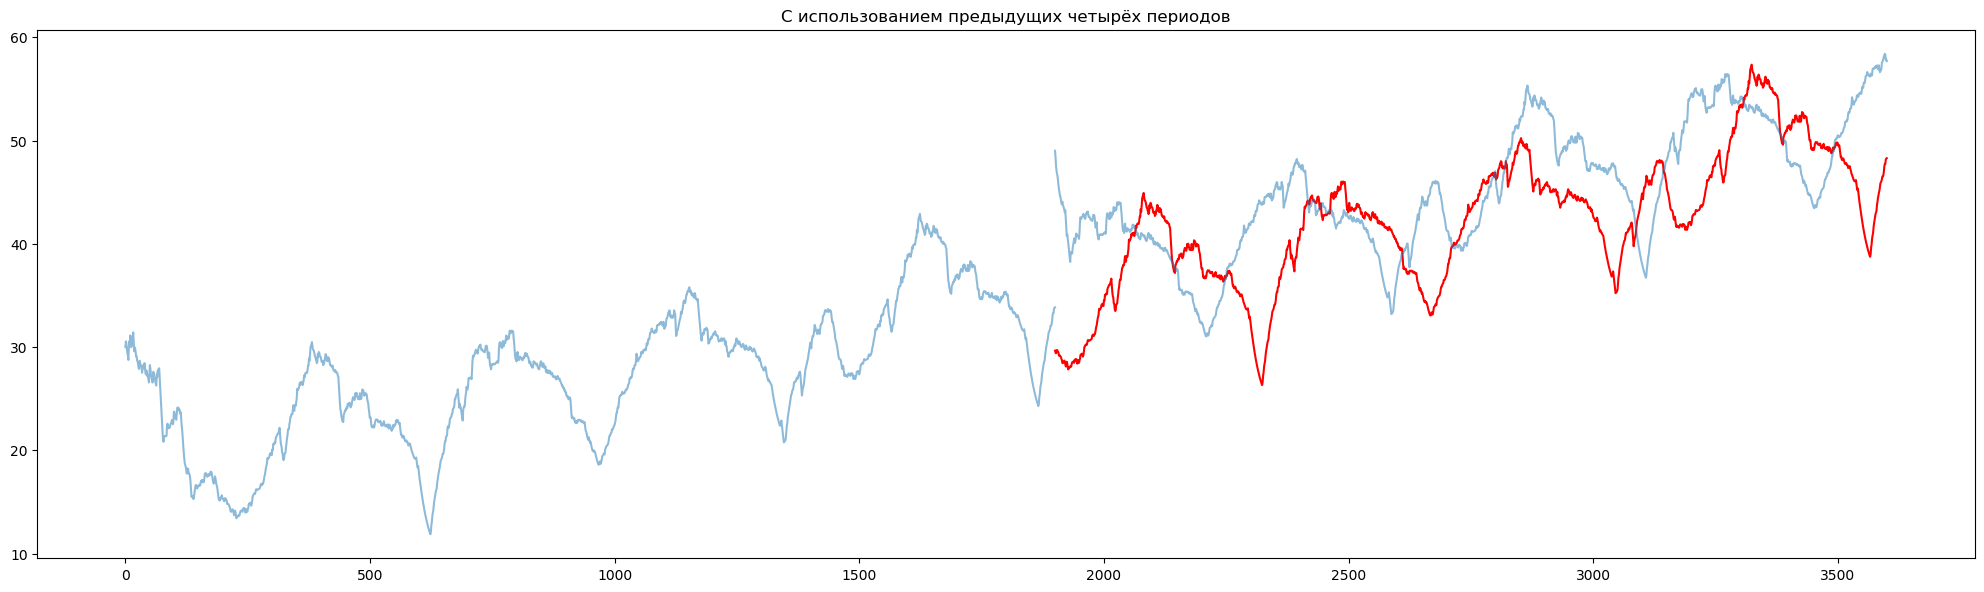

In [116]:
# С использованием предыдущих четырёх периодов
y_train, y_valid = global_power[:1900], global_power[1900:3600]

xs = np.linspace(0, 1900, 1900)

def f(ab):
    a, b = ab
    ys = a * xs + b
    return sum(map(lambda x:x ** 2, y_train - ys))

import scipy
a, b = scipy.optimize.minimize(f, (100, 1)).x
ys = a * xs + b

x_old = np.linspace(200, 1900, 1700)
x_new = np.linspace(1900, 3600, 1700)
y_predict = (y_train[200:] - a * x_old - b) + a * x_new + b

mape_score = 100 / 1700 * sum(map(lambda ey:abs((ey[0] - ey[1]) / ey[1]), zip(y_predict, y_valid)))
print(f"MAPE: {mape_score:.6f}%")

plt.figure(figsize=(25, 7))
plt.plot(xs, ema(0.05, y_train), alpha = 0.5)
plt.plot(x_new, ema(0.05, y_predict), "r")
plt.plot(x_new, ema(0.05, y_valid), "tab:blue", alpha = 0.5)
plt.title("С использованием предыдущих четырёх периодов")
plt.show()

MAPE: 14.936614%


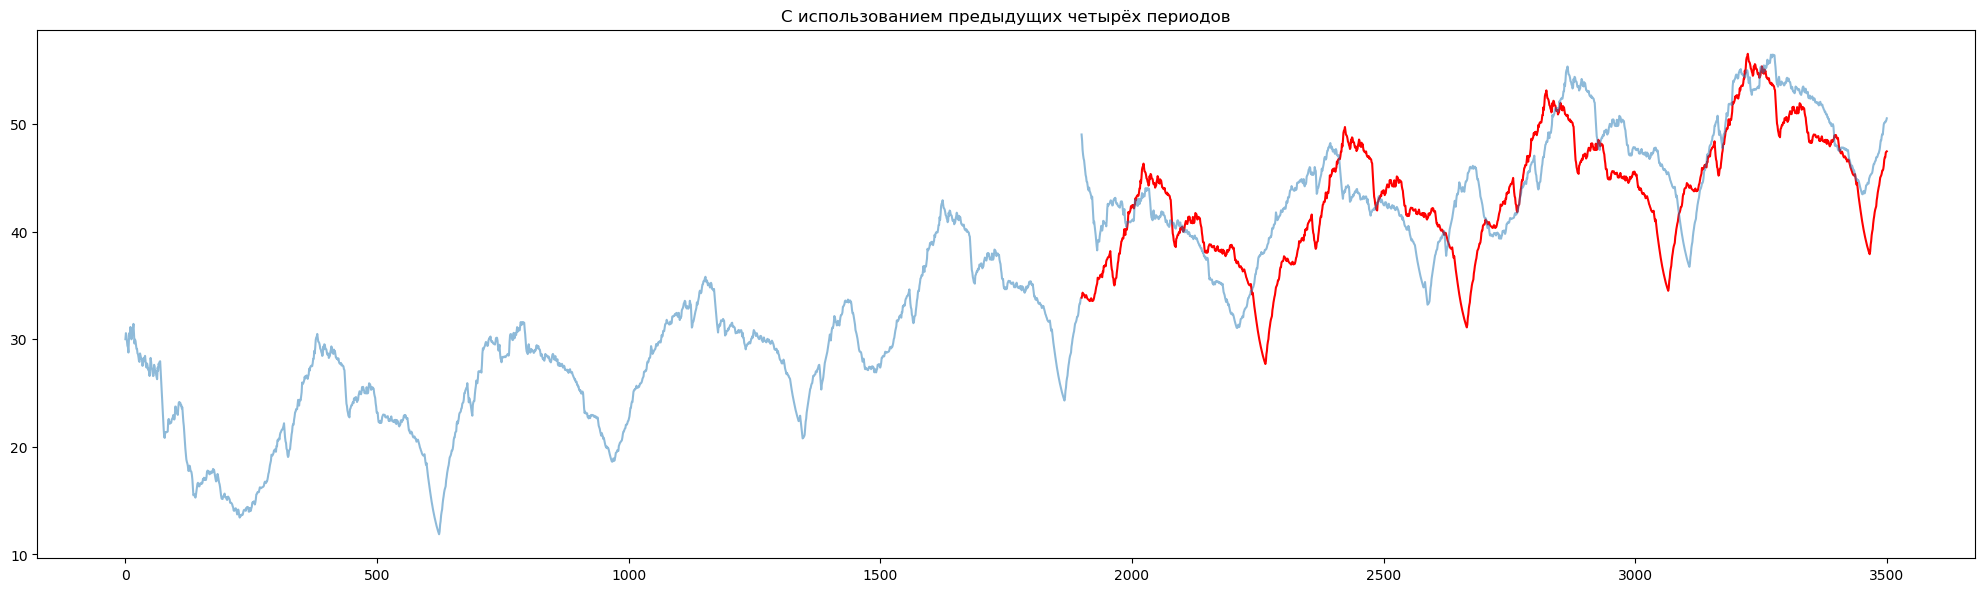

In [117]:
# С использованием последнего периода

y_train, y_valid = global_power[:1900], global_power[1900:3500]

xs = np.linspace(0, 1900, 1900)

def f(ab):
    a, b = ab
    ys = a * xs + b
    return sum(map(lambda x:x ** 2, y_train - ys))

import scipy
a, b = scipy.optimize.minimize(f, (100, 1)).x
ys = a * xs + b

x_old = np.linspace(1500, 1900, 400)
x_new = np.linspace(1900, 3500, 1600)
y_predict = (np.array(list(y_train[1500:]) * 4) - a * np.array(list(x_old) * 4) - b) + a * x_new + b

from sklearn.metrics import r2_score
r2score = r2_score(y_valid, y_predict)
mape_score = 100 / 1600 * sum(map(lambda ey:abs((ey[0] - ey[1]) / ey[1]), zip(y_predict, y_valid)))
print(f"MAPE: {mape_score:.6f}%")

plt.figure(figsize=(25, 7))
plt.plot(xs, ema(0.05, y_train), alpha = 0.5)
plt.plot(x_new, ema(0.05, y_predict), "r")
plt.plot(x_new, ema(0.05, y_valid), "tab:blue", alpha = 0.5)
plt.title("С использованием предыдущих четырёх периодов")
plt.show()